# Importing relevant packages

In [1]:
import pandas as pd
import pandas.util.testing as tm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set(style = 'ticks', color_codes = True)
import warnings
warnings.filterwarnings('ignore')

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  


# Importing the dataset

In [2]:
data = pd.read_csv(r'C:\Users\lenovo\Desktop\Car second sale price prediction\Car price prediction.csv')

# Preliminary Data-Analysis

In [3]:
data.head(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.0,crossover,0,5.5,Petrol,yes,2016,GLS 63
6,BMW,6100.0,sedan,438,2.0,Gas,yes,1997,320
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.8,Gas,no,1999,Golf IV


In [4]:
data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [5]:
print(data.shape)
data = data.dropna()
print(data.shape)

(4345, 9)
(4025, 9)


In [6]:
for column in data.columns:
    if type(data[column][0]) == str:
        print(f'Count of unique values in {column} is ', len(set(data[column])))
        print(pd.value_counts(data[column]), '\n')

Count of unique values in Brand is  7
Volkswagen       880
Mercedes-Benz    823
BMW              640
Toyota           510
Renault          445
Audi             420
Mitsubishi       307
Name: Brand, dtype: int64 

Count of unique values in Body is  6
sedan        1534
crossover     824
van           626
other         394
vagon         379
hatch         268
Name: Body, dtype: int64 

Count of unique values in Engine Type is  4
Diesel    1861
Petrol    1468
Gas        590
Other      106
Name: Engine Type, dtype: int64 

Count of unique values in Registration is  2
yes    3654
no      371
Name: Registration, dtype: int64 

Count of unique values in Model is  306
E-Class         188
Vito            156
A6              156
Kangoo          136
Camry           127
               ... 
GL 550            1
Cross Touran      1
CLC 180           1
ML 550            1
Vaneo             1
Name: Model, Length: 306, dtype: int64 



#### Dropping 'Model' as it has 312 unique values and won't contribute to a accurate model

In [7]:
data = data.drop(['Model'], axis = 1)

# Data visualization Pre-cleasing

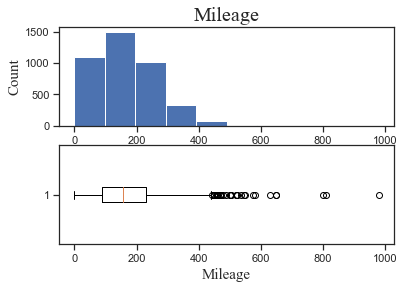

In [8]:
plt.subplot(2,1,1)
plt.hist(data['Mileage'])
plt.title('Mileage', fontsize = 20, fontdict = {'fontname' : 'Times New Roman'})
plt.ylabel('Count', fontsize = 15, fontdict = {'fontname' : 'Times New Roman'})

plt.subplot(2,1,2)
plt.boxplot(data['Mileage'], vert = False)
plt.xlabel('Mileage', fontsize = 15, fontdict = {'fontname' : 'Times New Roman'})
plt.show()

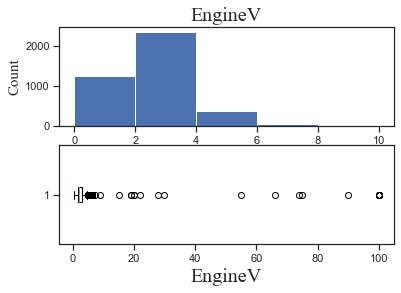

In [9]:
plt.subplot(2,1,1)
plt.hist(data['EngineV'], bins = [i for i in range(0, 11, 2)])
plt.title('EngineV', fontsize = 20, fontdict = {'fontname' : 'Times New Roman'})
plt.ylabel('Count', fontsize = 15, fontdict = {'fontname' : 'Times New Roman'})

plt.subplot(2,1,2)
plt.boxplot(data['EngineV'], vert = False)
plt.xlabel('EngineV', fontsize = 20, fontdict = {'fontname' : 'Times New Roman'})
plt.show()

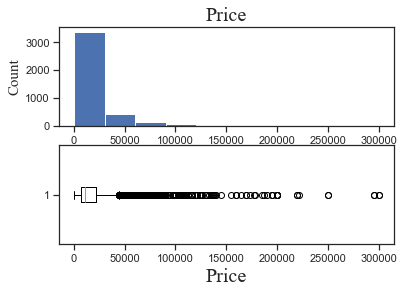

In [10]:
plt.subplot(2,1,1)
plt.hist(data['Price'])
plt.title('Price', fontsize = 20, fontdict = {'fontname' : 'Times New Roman'})
plt.ylabel('Count', fontsize = 15, fontdict = {'fontname' : 'Times New Roman'})

plt.subplot(2,1,2)
plt.boxplot(data['Price'], vert = False)
plt.xlabel('Price', fontsize = 20, fontdict = {'fontname' : 'Times New Roman'})
plt.show()

# Data cleasing

In [11]:
inx = data[(data['Mileage'] > 450) | (data['EngineV'] > 5) | (data['Price'] > 45000)].index
print(len(inx))
print(data.shape)
data.drop(inx, inplace = True)
print(data.shape)
data = data.reset_index(drop = True)

454
(4025, 8)
(3571, 8)


# Data visualization post-cleasing

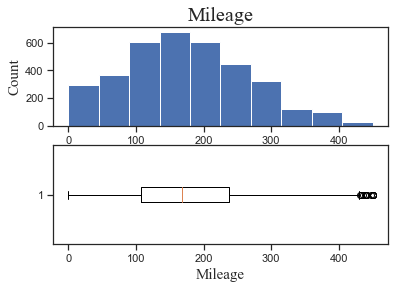

In [12]:
plt.subplot(2,1,1)
plt.hist(data['Mileage'])
plt.title('Mileage', fontsize = 20, fontdict = {'fontname' : 'Times New Roman'})
plt.ylabel('Count', fontsize = 15, fontdict = {'fontname' : 'Times New Roman'})

plt.subplot(2,1,2)
plt.boxplot(data['Mileage'], vert = False)
plt.xlabel('Mileage', fontsize = 15, fontdict = {'fontname' : 'Times New Roman'})
plt.show()

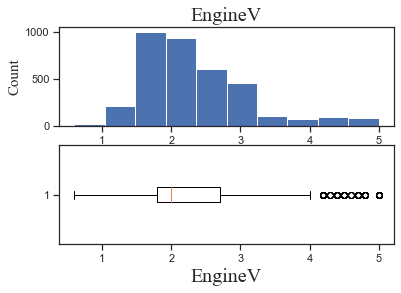

In [13]:
plt.subplot(2,1,1)
plt.hist(data['EngineV'])
plt.title('EngineV', fontsize = 20, fontdict = {'fontname' : 'Times New Roman'})
plt.ylabel('Count', fontsize = 15, fontdict = {'fontname' : 'Times New Roman'})

plt.subplot(2,1,2)
plt.boxplot(data['EngineV'], vert = False)
plt.xlabel('EngineV', fontsize = 20, fontdict = {'fontname' : 'Times New Roman'})
plt.show()

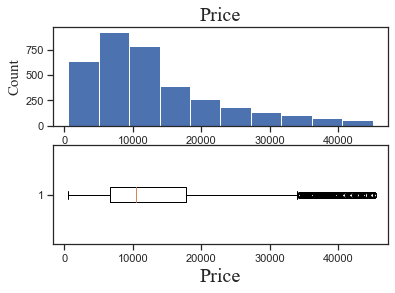

In [14]:
plt.subplot(2,1,1)
plt.hist(data['Price'])
plt.title('Price', fontsize = 20, fontdict = {'fontname' : 'Times New Roman'})
plt.ylabel('Count', fontsize = 15, fontdict = {'fontname' : 'Times New Roman'})

plt.subplot(2,1,2)
plt.boxplot(data['Price'], vert = False)
plt.xlabel('Price', fontsize = 20, fontdict = {'fontname' : 'Times New Roman'})
plt.show()

# F regression

In [15]:
data = pd.get_dummies(data)
print(data.columns)

Index(['Price', 'Mileage', 'EngineV', 'Year', 'Brand_Audi', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_crossover', 'Body_hatch',
       'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Diesel', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_no', 'Registration_yes'],
      dtype='object')


In [16]:
features = data.drop(['Price'], axis = 1)
outcome = data['Price']

In [17]:
features.shape, outcome.shape

((3571, 22), (3571,))

In [18]:
from sklearn.feature_selection import f_regression
f_reg = f_regression(features, outcome)

In [19]:
reg_summary = pd.DataFrame(data = features.columns, columns = ['Features'])
reg_summary['Co-efficient'] = f_reg[0]
reg_summary['p-value'] = f_reg[1].round(3)
reg_summary

,Features,Co-efficient,p-value
0,Mileage,1237.568189,0.000
1,EngineV,460.190938,0.000
2,Year,2083.263036,0.000
3,Brand_Audi,6.162042,0.013
4,Brand_BMW,42.054434,0.000
5,Brand_Mercedes-Benz,1.705634,0.192
6,Brand_Mitsubishi,13.534376,0.000
7,Brand_Renault,151.875485,0.000
8,Brand_Toyota,105.486431,0.000
9,Brand_Volkswagen,21.640640,0.000


## Assumptions cross-check

### Checking Linearity

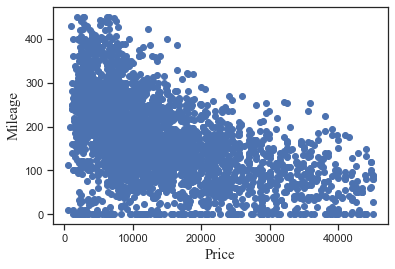

In [20]:
plt.scatter(data['Price'], data['Mileage'])
plt.xlabel('Price', fontsize = 15, fontdict = {'fontname' : 'Times New Roman'})
plt.ylabel('Mileage', fontsize = 15, fontdict = {'fontname' : 'Times New Roman'})
plt.show()

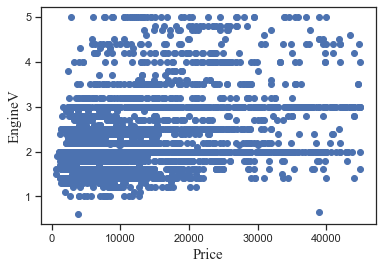

In [21]:
plt.scatter(data['Price'], data['EngineV'])
plt.xlabel('Price', fontsize = 15, fontdict = {'fontname' : 'Times New Roman'})
plt.ylabel('EngineV', fontsize = 15, fontdict = {'fontname' : 'Times New Roman'})
plt.show()

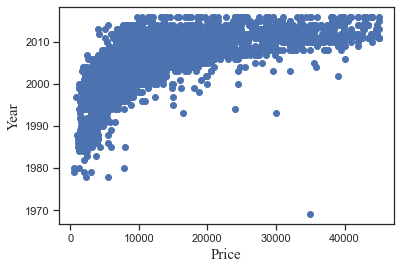

In [22]:
plt.scatter(data['Price'], data['Year'])
plt.xlabel('Price', fontsize = 15, fontdict = {'fontname' : 'Times New Roman'})
plt.ylabel('Year', fontsize = 15, fontdict = {'fontname' : 'Times New Roman'})
plt.show()

In [23]:
#The relation is exponential, so changing the features to logarthimic
data['Log_Mileage'] = np.log(data['Mileage'])
data['Log_Year'] = np.log(data['Year'])
data['Log_EngineV'] = np.log(data['EngineV'])
data.columns

Index(['Price', 'Mileage', 'EngineV', 'Year', 'Brand_Audi', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_crossover', 'Body_hatch',
       'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Diesel', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_no', 'Registration_yes',
       'Log_Mileage', 'Log_Year', 'Log_EngineV'],
      dtype='object')

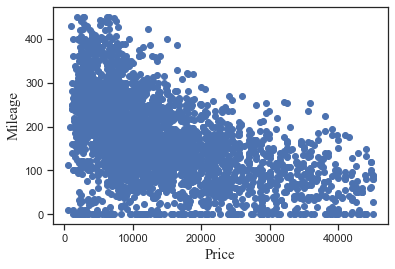

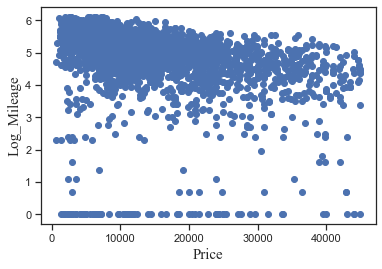

In [24]:
plt.scatter(data['Price'], data['Mileage'])
plt.xlabel('Price', fontsize = 15, fontdict = {'fontname' : 'Times New Roman'})
plt.ylabel('Mileage', fontsize = 15, fontdict = {'fontname' : 'Times New Roman'})
plt.show()

plt.scatter(data['Price'], data['Log_Mileage'])
plt.xlabel('Price', fontsize = 15, fontdict = {'fontname' : 'Times New Roman'})
plt.ylabel('Log_Mileage', fontsize = 15, fontdict = {'fontname' : 'Times New Roman'})
plt.show()

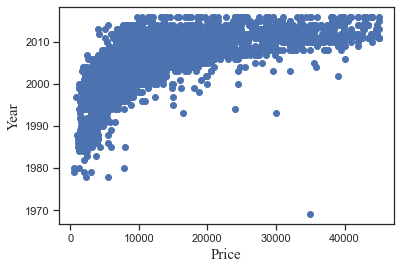

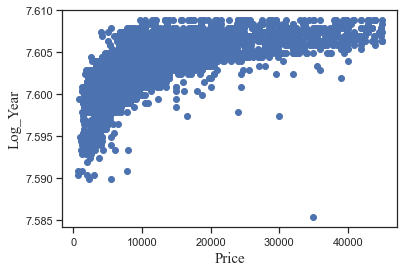

In [25]:
plt.scatter(data['Price'], data['Year'])
plt.xlabel('Price', fontsize = 15, fontdict = {'fontname' : 'Times New Roman'})
plt.ylabel('Year', fontsize = 15, fontdict = {'fontname' : 'Times New Roman'})
plt.show()

plt.scatter(data['Price'], data['Log_Year'])
plt.xlabel('Price', fontsize = 15, fontdict = {'fontname' : 'Times New Roman'})
plt.ylabel('Log_Year', fontsize = 15, fontdict = {'fontname' : 'Times New Roman'})
plt.show()

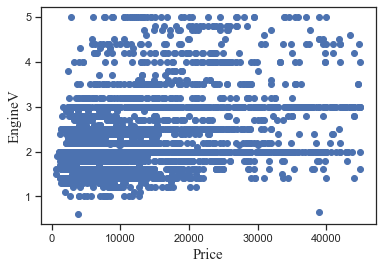

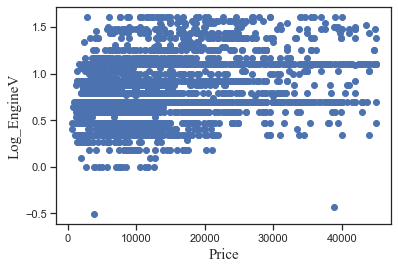

In [26]:
plt.scatter(data['Price'], data['EngineV'])
plt.xlabel('Price', fontsize = 15, fontdict = {'fontname' : 'Times New Roman'})
plt.ylabel('EngineV', fontsize = 15, fontdict = {'fontname' : 'Times New Roman'})
plt.show()

plt.scatter(data['Price'], data['Log_EngineV'])
plt.xlabel('Price', fontsize = 15, fontdict = {'fontname' : 'Times New Roman'})
plt.ylabel('Log_EngineV', fontsize = 15, fontdict = {'fontname' : 'Times New Roman'})
plt.show()

As we can see from the above scatter plot, the relationship between the feature and outcome is not linear so we will be opting for ploynomial regression model for this case.

# Polynomial regression

## Train-test split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(features, outcome, test_size = 0.2, random_state = 42)

In [29]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2856, 22), (715, 22), (2856,), (715,))

In [30]:
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)
x_train = x_train.reset_index(drop = True)
x_test = x_test.reset_index(drop = True)

# Polynomial regression model

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [32]:
poly_reg = PolynomialFeatures(degree = 2)
x_poly_train = poly_reg.fit_transform(x_train)
poly_reg.fit(x_poly_train, y_train)
poly_line = LinearRegression()
poly_line.fit(x_poly_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
y_hat = poly_line.predict(x_poly_train).round()
reg_accuracy = pd.DataFrame()
reg_accuracy['Predicted Value'] = y_hat
reg_accuracy['Actual_value'] = y_train
reg_accuracy

,Predicted Value,Actual_value
0,22214.0,28500.0
1,8962.0,8900.0
2,5930.0,4999.0
3,15024.0,13900.0
4,13391.0,17900.0
...,...,...
2851,5221.0,2650.0
2852,5236.0,8999.0
2853,14103.0,15800.0
2854,7176.0,4500.0


In [34]:
reg_accuracy.to_csv(r'C:\Users\lenovo\Desktop\Car second sale price prediction\Polynomial_Accuracy.csv')

In [35]:
print(poly_line.score(x_poly_train, y_train).round(4) * 100 ,'%')

86.81 %


In [36]:
x_poly_test = poly_reg.fit_transform(x_test)
print(poly_line.score(x_poly_test, y_test).round(4) * 100, '%')

85.77 %


#### Before data cleansing:
Accuracy score on train-data set is 72.18 %

Accuracy score on test-data set is -228.50 %

#### After Data cleansing:

Accuracy score on train-data set is 86.81 %

Accuracy score on train-data set is 85.77 %